In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import warnings

In [2]:
# Disable SSL warnings (optional but not recommended in production)
warnings.filterwarnings("ignore")


In [3]:

# load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pre-process data
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('int16') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('int16') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [4]:

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
    # model.fit: Entrena el modelo.
    # X_train, y_train: Datos de entrenamiento (características y etiquetas).
    # epochs=10: El modelo pasará por todo el conjunto de datos de entrenamiento 10 veces.
    # batch_size=128: Los datos se procesan en grupos de 128 muestras a la vez.
    # validation_data=(X_test, y_test): Usa los datos de prueba para evaluar el rendimiento del modelo después de cada epoch.
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8560 - loss: 0.4763 - val_accuracy: 0.9830 - val_loss: 0.0544
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9787 - loss: 0.0672 - val_accuracy: 0.9853 - val_loss: 0.0475
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0430 - val_accuracy: 0.9877 - val_loss: 0.0372
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9902 - loss: 0.0315 - val_accuracy: 0.9902 - val_loss: 0.0302
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9930 - loss: 0.0243 - val_accuracy: 0.9893 - val_loss: 0.0332
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9894 - val_loss: 0.0336
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accu

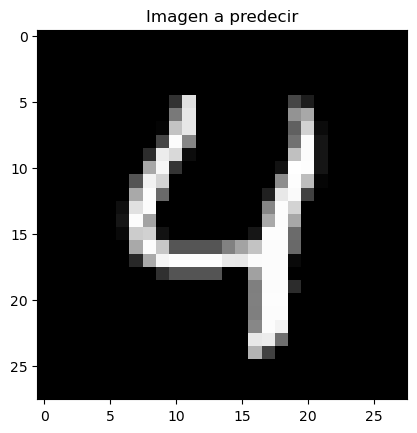

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
El modelo predice que el dígito es: 4


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que tenemos una imagen individual llamada `image`
# La imagen debe tener el mismo preprocesamiento que las imágenes de entrenamiento
# Aquí, simplemente tomamos una imagen del conjunto de prueba como ejemplo

image = X_test[4]

# Mostrar la imagen
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title("Imagen a predecir")
plt.show()

# Predecir la clase de la imagen
image = image.reshape(1, 28, 28, 1)  # Redimensionar para que tenga la forma (1, 28, 28, 1)
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

print(f'El modelo predice que el dígito es: {predicted_class}')